In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def create_book_sales_data():
    books = [
        'The Great Gatsby', 'To Kill a Mockingbird', '1984', 'Pride and Prejudice', 
        'The Catcher in the Rye', 'The Lord of the Rings', 'Harry Potter and the Philosopher\'s Stone',
        'The Hobbit', 'The Da Vinci Code', 'The Alchemist', 'The Little Prince', 
        'The Hunger Games', 'The Girl with the Dragon Tattoo', 'Gone Girl', 
        'The Shining', 'It', 'The Handmaid\'s Tale', 'Brave New World', 
        'The Chronicles of Narnia', 'The Kite Runner', 'The Book Thief', 
        'The Fault in Our Stars', 'The Martian', 'The Road', 'The Stand'
    ]
    
    authors = [
        'F. Scott Fitzgerald', 'Harper Lee', 'George Orwell', 'Jane Austen',
        'J.D. Salinger', 'J.R.R. Tolkien', 'J.K. Rowling',
        'J.R.R. Tolkien', 'Dan Brown', 'Paulo Coelho', 'Antoine de Saint-Exupéry',
        'Suzanne Collins', 'Stieg Larsson', 'Gillian Flynn',
        'Stephen King', 'Stephen King', 'Margaret Atwood', 'Aldous Huxley',
        'C.S. Lewis', 'Khaled Hosseini', 'Markus Zusak',
        'John Green', 'Andy Weir', 'Cormac McCarthy', 'Stephen King'
    ]
    
    categories = [
        'Classic', 'Classic', 'Dystopian', 'Classic',
        'Classic', 'Fantasy', 'Fantasy',
        'Fantasy', 'Thriller', 'Fiction', 'Fiction',
        'Young Adult', 'Thriller', 'Thriller',
        'Horror', 'Horror', 'Dystopian', 'Dystopian',
        'Fantasy', 'Fiction', 'Historical Fiction',
        'Young Adult', 'Science Fiction', 'Post-Apocalyptic', 'Horror'
    ]
    
    # Prix moyens pour chaque livre
    prices = [
        12.99, 14.99, 10.99, 11.99,
        13.99, 19.99, 16.99,
        15.99, 14.99, 12.99, 9.99,
        13.99, 15.99, 14.99,
        12.99, 17.99, 13.99, 11.99,
        16.99, 12.99, 13.99,
        12.99, 14.99, 11.99, 19.99
    ]

    book_info = {books[i]: {'author': authors[i], 'category': categories[i], 'price': prices[i]} for i in range(len(books))}

    data = []
    order_id = 1000

    for month in range(1, 13):
        days_in_month = 30 if month in [4,6,9,11] else 31
        days_in_month = 28 if month == 2 else days_in_month

        for day in range(1, days_in_month + 1):
            date = f"2023-{month:02d}-{day:02d}"

            day_of_week = datetime.strptime(date, '%Y-%m-%d').weekday()
            if day_of_week in [5, 6]:
                num_transactions = np.random.randint(15, 25)
            else:
                num_transactions = np.random.randint(8, 15)

            for _ in range(num_transactions):
                num_books = np.random.randint(1, 6)
                customer_type = np.random.choice(['Student', 'Teacher', 'Regular', 'Collector'], p=[0.3, 0.2, 0.4, 0.1])
                payment_method = np.random.choice(['Credit Card', 'Debit Card', 'Paypal', 'Cach'], p=[0.5, 0.3, 0.15, 0.05])
                customer_gender = np.random.choice(['Male', 'Female'])

                customer_age = np.random.choice(['18-25', '26,35', '36-45', '46-55', '56+'])
                book_format = np.random.choice(['Paperback', 'Hardcover', 'E-book'], p=[0.6, 0.3, 0.1])
                rating = np.random.randint(3, 6)

                transaction_books = np.random.choice(books, num_books, replace=False)

                for book in transaction_books:
                    author = book_info[book]['author']
                    category = book_info[book]['category']
                    base_price = book_info[book]['price']

                    if book_format == 'Hardcover':
                        price = base_price * 1.5
                    elif book_format == 'E-book':
                        price = base_price * 0.8
                    else:
                        price = base_price

                    price = price * (1 + np.random.uniform(-0.1, 0.1))
                    quantity = 1 if np.random.random() > 0.1 else np.random.randint(2, 4)

                    sales = quantity * price

                    data.append({
                        'order_id': f"ORD-{order_id}",
                        'date': date,
                        'book': book,
                        'author': author,
                        'category': category,
                        'quantity': quantity,
                        'unit_price': round(price, 2),
                        'total_sales': round(sales, 2),
                        'customer_type': customer_type,
                        'payment_method': payment_method,
                        'customer_gender': customer_gender,
                        'customer_age': customer_age,
                        'book_format': book_format,
                        'rating': rating
                    })

                    order_id += 1

    
    df = pd.DataFrame(data)
    df.to_csv('book_sales.csv', index=False)
    print("Fichier book_sales.csv créé avec succès!")

    return df


df = create_book_sales_data()
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.day_name()


        

Fichier book_sales.csv créé avec succès!


In [13]:
print("Information du dataset:")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("\nRésumé statistique:")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)

print("\nValeurs manquantes :")
print("=" * 50)
print(df.isnull().sum())
print("\n" + "=" * 50)

Information du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14805 entries, 0 to 14804
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         14805 non-null  object        
 1   date             14805 non-null  datetime64[ns]
 2   book             14805 non-null  object        
 3   author           14805 non-null  object        
 4   category         14805 non-null  object        
 5   quantity         14805 non-null  int64         
 6   unit_price       14805 non-null  float64       
 7   total_sales      14805 non-null  float64       
 8   customer_type    14805 non-null  object        
 9   payment_method   14805 non-null  object        
 10  customer_gender  14805 non-null  object        
 11  customer_age     14805 non-null  object        
 12  book_format      14805 non-null  object        
 13  rating           14805 non-null  int64         
 14  month         

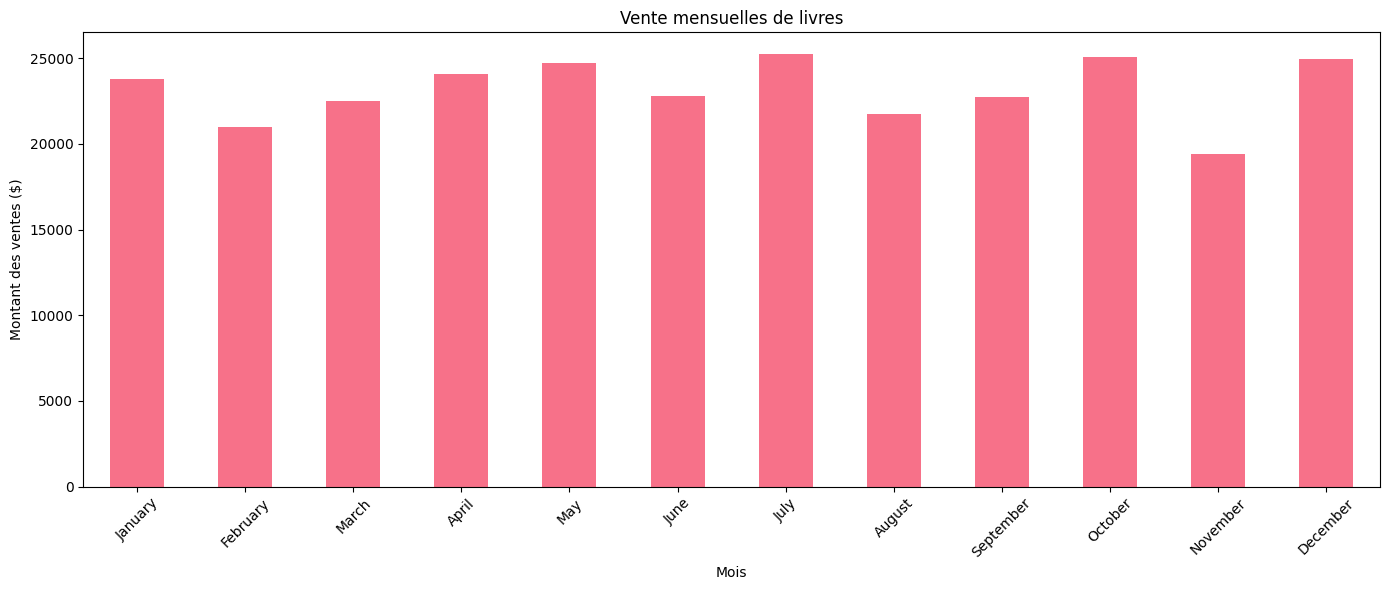

In [15]:
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

plt.figure(figsize=(14, 6))
monthly_sales = df.groupby('month')['total_sales'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar')
plt.title('Vente mensuelles de livres')
plt.xlabel('Ventes mensuelles de livres')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

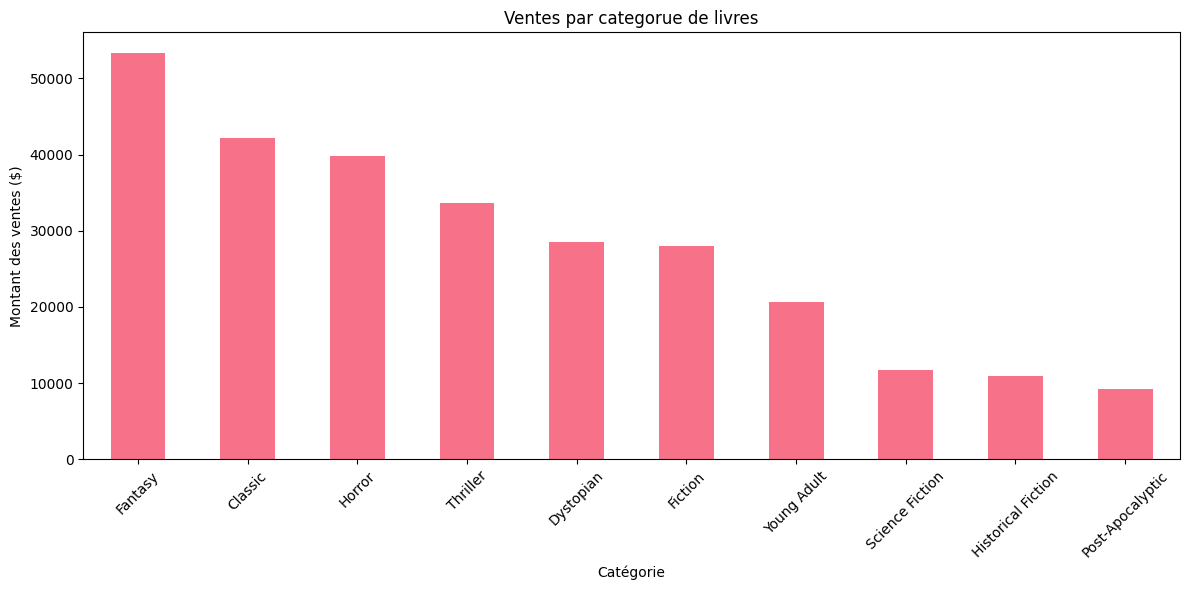

In [16]:
plt.figure(figsize=(12, 6))
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title('Ventes par categorue de livres')
plt.xlabel('Catégorie')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

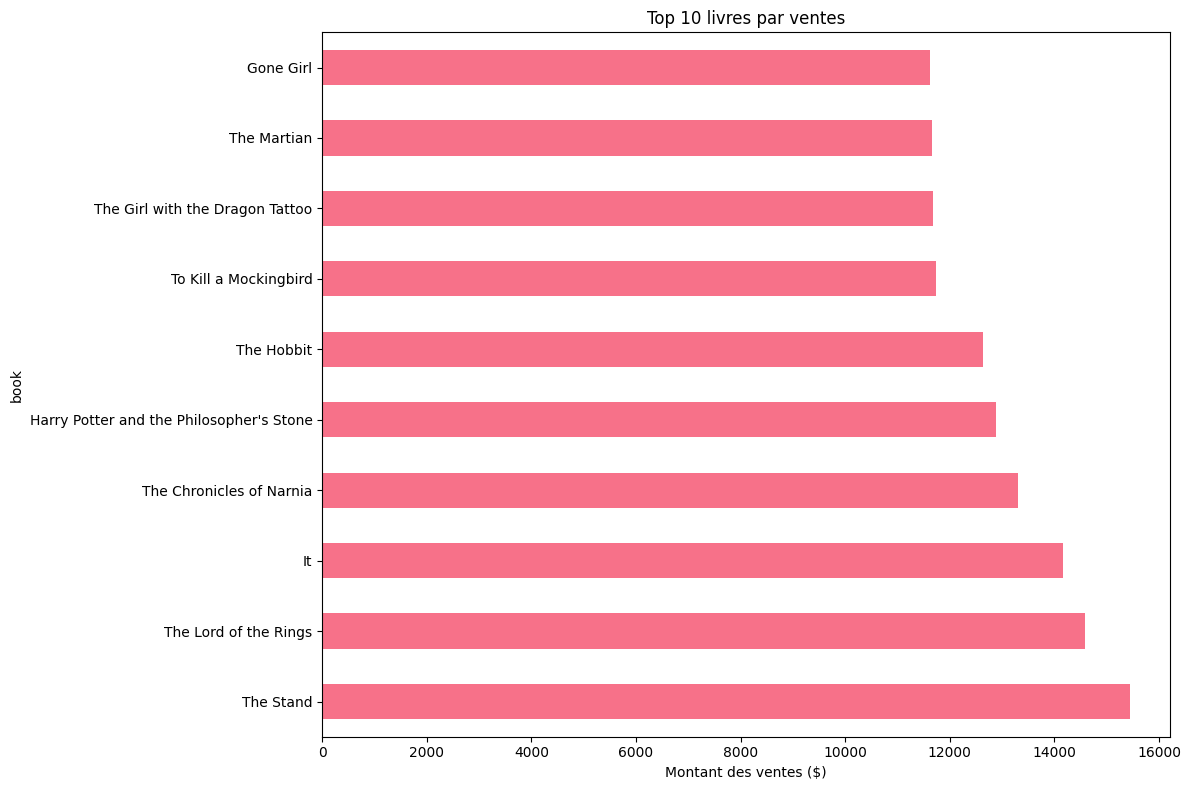

In [18]:
plt.figure(figsize=(12,8))
top_books = df.groupby('book')['total_sales'].sum().sort_values(ascending=False).head(10)
top_books.plot(kind='barh')
plt.title('Top 10 livres par ventes')
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

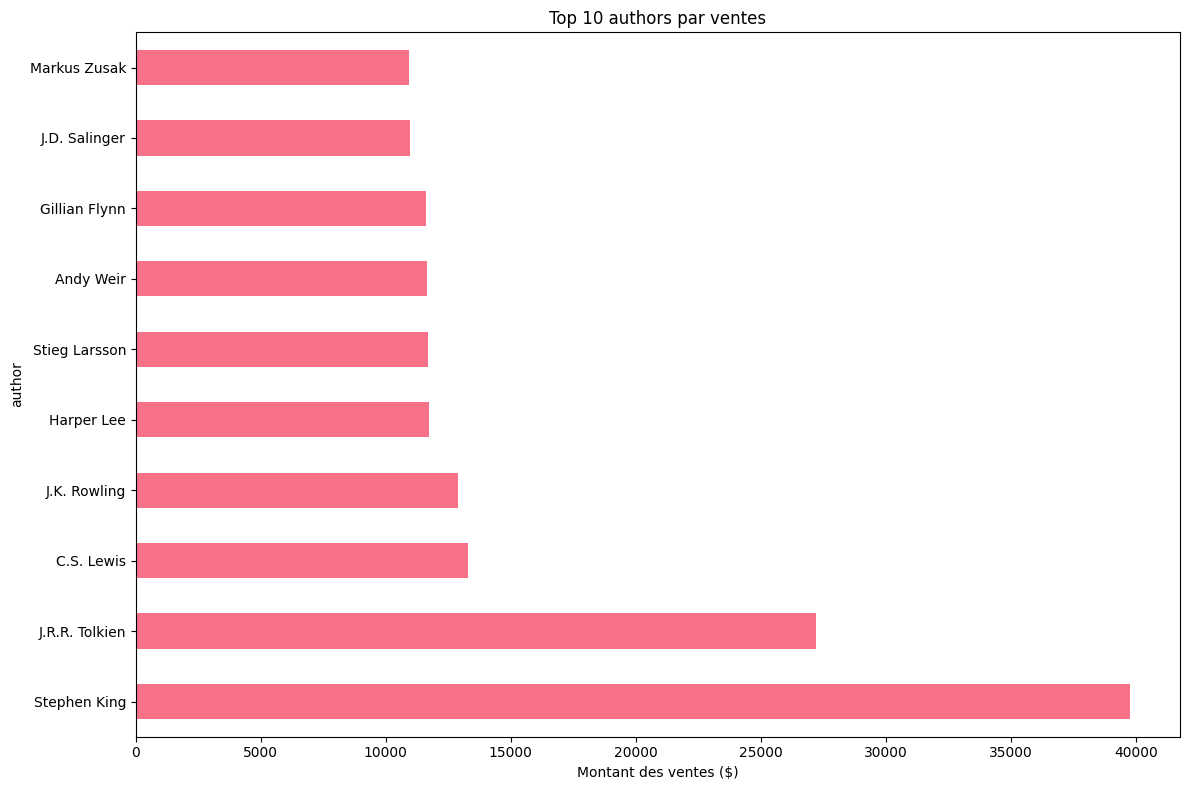

In [19]:
plt.figure(figsize=(12, 8))
top_authors = df.groupby('author')['total_sales'].sum().sort_values(ascending=False).head(10)
top_authors.plot(kind="barh")
plt.title('Top 10 authors par ventes')
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

# 6. Ventes par type de client

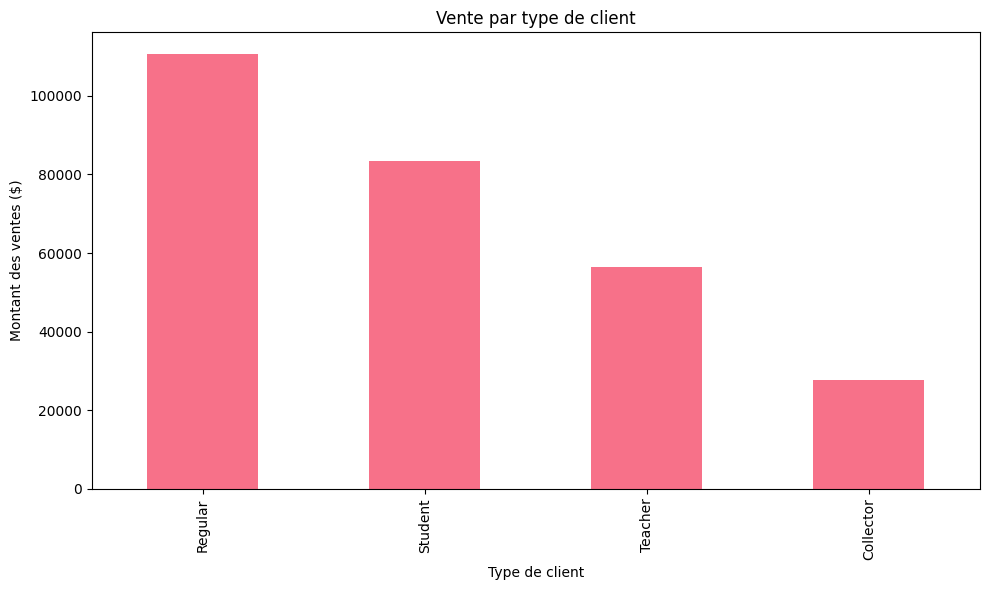

In [20]:
plt.figure(figsize=(10, 6))
customer_sales = df.groupby('customer_type')['total_sales'].sum().sort_values(ascending=False)
customer_sales.plot(kind='bar')
plt.title('Vente par type de client')
plt.xlabel('Type de client')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

# 7. ventes pag groupe d'age

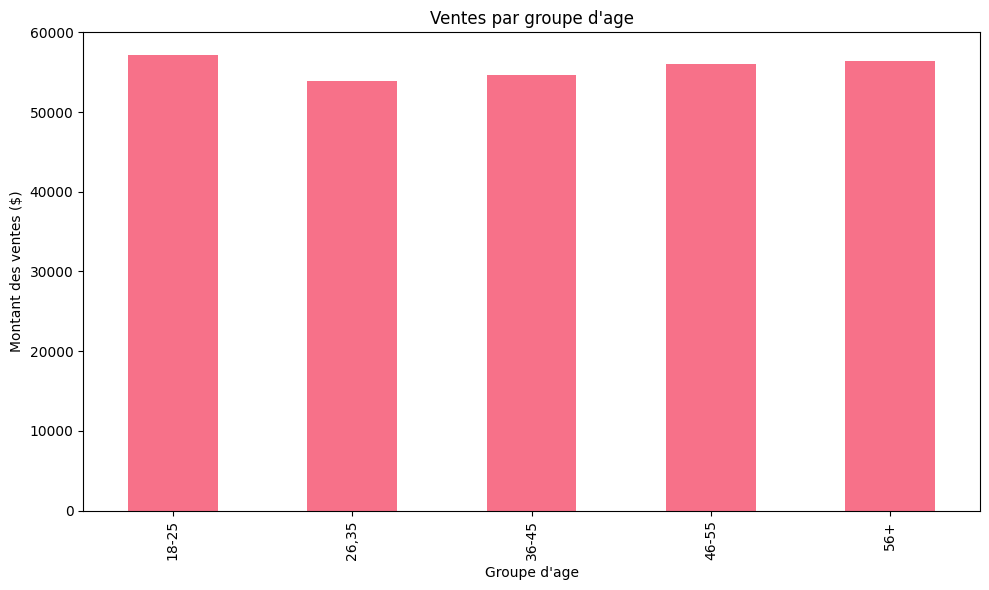

In [22]:
plt.figure(figsize=(10,6))
age_sales = df.groupby('customer_age')['total_sales'].sum()
age_sales.plot(kind='bar')
plt.title('Ventes par groupe d\'age')
plt.xlabel('Groupe d\'age')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

# 8. Distribution des notes

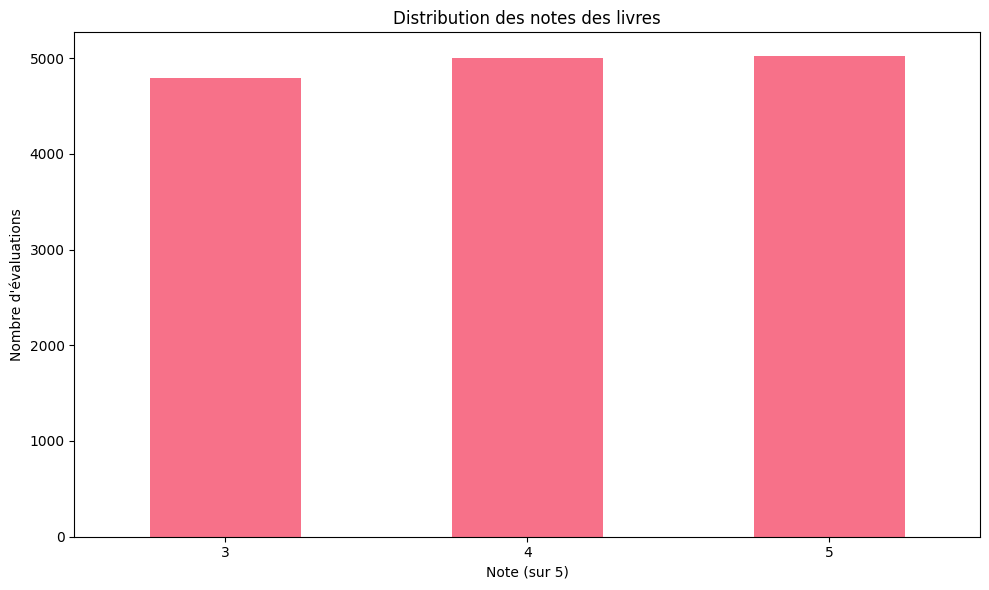

In [24]:
plt.figure(figsize=(10, 6))
rating_counts = df['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar')
plt.title('Distribution des notes des livres')
plt.xlabel('Note (sur 5)')
plt.ylabel('Nombre d\'évaluations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 9. ventes par jour de la semaine

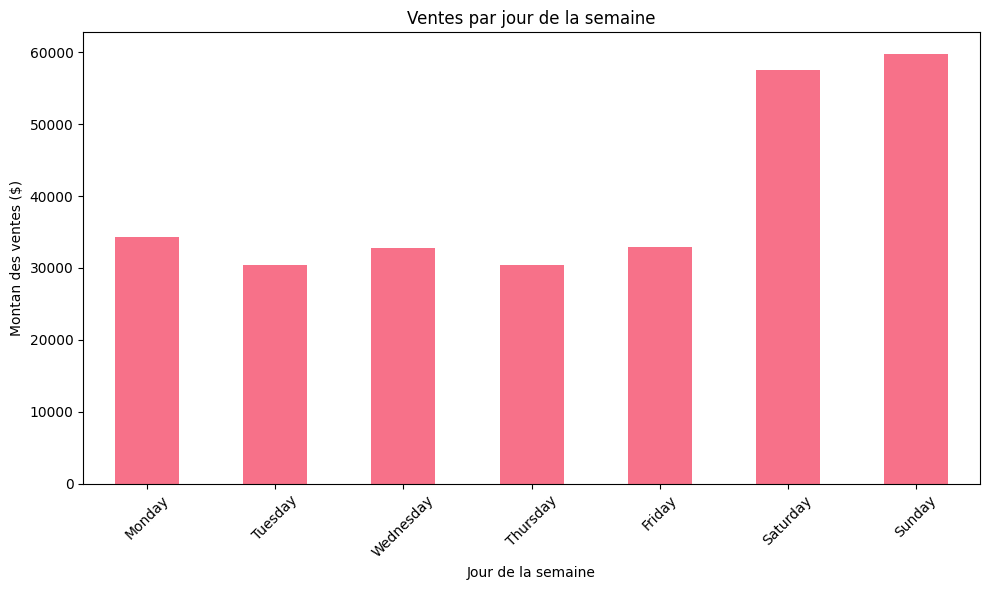

In [25]:
plt.figure(figsize=(10, 6))
day_sales = df.groupby('day_of_week')['total_sales'].sum()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Ventes par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Montan des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Prix moyen par catégorie

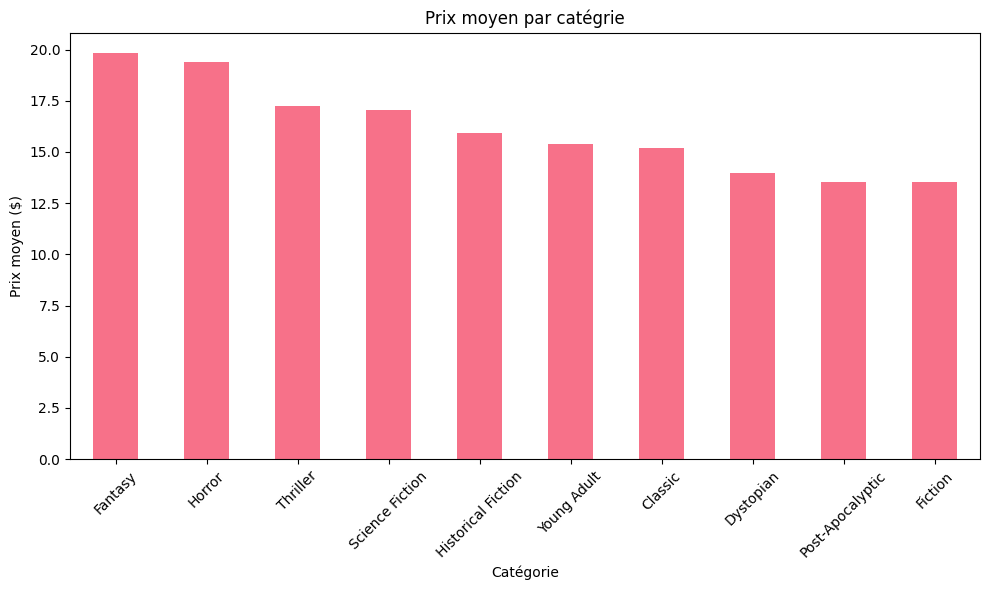

In [26]:
plt.figure(figsize=(10, 6))
avg_price = df.groupby('category')['unit_price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar')
plt.title('Prix moyen par catégrie')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()